In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

# Read in and explore results of ARM analysis

### Read in association rules from ARM analysis

In [3]:
# Read in association rules
rules = pd.read_csv('ThyCa_FA_ARM_results.tsv', sep='\t')

In [4]:
# Remove the apocrita index column
rules = rules.drop(axis=1, labels='Unnamed: 0')

In [5]:
# Convert column values from strings to lists
rules['antecedents'] = rules['antecedents'].str.strip("''[]").str.split(',')
rules['consequents'] = rules['consequents'].str.strip("''[]").str.split(',')

In [6]:
# Sort the dataframe by lift values
rules = rules.sort_values(axis=0, by='lift', ascending=False)

In [7]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
130,"[p191.11', 'p190]","[p191.1', 'p193', 'p191]",0.000142,0.000147,0.000142,1.000000,6808.344828,0.000142,inf
128,"[p191.11', 'p191.1', 'p193]","[p190', 'p191]",0.000147,0.000142,0.000142,0.965517,6808.344828,0.000142,28.995887
127,"[p191.1', 'p193', 'p191]","[p191.11', 'p190]",0.000147,0.000142,0.000142,0.965517,6808.344828,0.000142,28.995887
137,"[p191.11', 'p193]","[p191.1', 'p190', 'p191]",0.000147,0.000142,0.000142,0.965517,6808.344828,0.000142,28.995887
138,"[p191.1', 'p193]","[p191.11', 'p190', 'p191]",0.000147,0.000142,0.000142,0.965517,6808.344828,0.000142,28.995887
...,...,...,...,...,...,...,...,...,...
328,"[p401.1', 'p401', 'p411]",[p193],0.093610,0.001737,0.000139,0.001488,0.856480,-0.000023,0.999750
336,[p193],"[p401.1', 'p401', 'p411]",0.001737,0.093610,0.000139,0.080175,0.856480,-0.000023,0.985394
324,[p193],"[p401.1', 'p411]",0.001737,0.093610,0.000139,0.080175,0.856480,-0.000023,0.985394
318,"[p401', 'p411]",[p193],0.093709,0.001737,0.000139,0.001486,0.855578,-0.000024,0.999749


### Create dataframe with disease names

In [8]:
# Read in csv and add header
phecode_diseases = pd.read_csv('phecodes_cols.txt', sep='\t', names=['phecode', 'disease'])

In [9]:
phecode_diseases

,phecode,disease
0,p008,Intestinal infection|p008
1,p008.5,Bacterial enteritis|p008.5
2,p008.51,Intestinal e.coli|p008.51
3,p008.52,Intestinal infection due to C. difficile|p008.52
4,p008.6,Viral Enteritis|p008.6
...,...,...
1212,p990,Effects radiation NOS|p990
1213,p994,Sepsis and SIRS|p994
1214,p994.1,Systemic inflammatory response syndrome (SIRS)...
1215,p994.2,Sepsis|p994.2


In [10]:
# Remove everything after pipe in disease column
phecode_diseases['disease'] = phecode_diseases['disease'].str.split('|').str[0]

In [11]:
phecode_diseases

,phecode,disease
0,p008,Intestinal infection
1,p008.5,Bacterial enteritis
2,p008.51,Intestinal e.coli
3,p008.52,Intestinal infection due to C. difficile
4,p008.6,Viral Enteritis
...,...,...
1212,p990,Effects radiation NOS
1213,p994,Sepsis and SIRS
1214,p994.1,Systemic inflammatory response syndrome (SIRS)
1215,p994.2,Sepsis


### Seperate/Categorize association rules

In [12]:
# Create dataframe where lift values are above 1
positive_rules = rules.loc[rules['lift'] >= 1]

# Create dataframe where lift values are below 1
negative_rules = rules.loc[rules['lift'] <= 1]

In [13]:
positive_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
130,"[p191.11', 'p190]","[p191.1', 'p193', 'p191]",0.000142,0.000147,0.000142,1.000000,6808.344828,0.000142,inf
128,"[p191.11', 'p191.1', 'p193]","[p190', 'p191]",0.000147,0.000142,0.000142,0.965517,6808.344828,0.000142,28.995887
127,"[p191.1', 'p193', 'p191]","[p191.11', 'p190]",0.000147,0.000142,0.000142,0.965517,6808.344828,0.000142,28.995887
137,"[p191.11', 'p193]","[p191.1', 'p190', 'p191]",0.000147,0.000142,0.000142,0.965517,6808.344828,0.000142,28.995887
138,"[p191.1', 'p193]","[p191.11', 'p190', 'p191]",0.000147,0.000142,0.000142,0.965517,6808.344828,0.000142,28.995887
...,...,...,...,...,...,...,...,...,...
379,[p535],[p193],0.124680,0.001737,0.000225,0.001808,1.040568,0.000009,1.000071
394,[p193],"[p535', 'p530]",0.001737,0.063887,0.000114,0.065598,1.026775,0.000003,1.001831
392,"[p535', 'p530]",[p193],0.063887,0.001737,0.000114,0.001784,1.026775,0.000003,1.000047
528,[p565],[p193],0.063522,0.001737,0.000111,0.001754,1.009721,0.000001,1.000017


In [14]:
negative_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
309,[p411],[p193],0.127744,0.001737,0.000192,0.001507,0.867260,-0.000029,0.999769
308,[p193],[p411],0.001737,0.127744,0.000192,0.110787,0.867260,-0.000029,0.980931
323,"[p401.1', 'p411]",[p193],0.093610,0.001737,0.000139,0.001488,0.856480,-0.000023,0.999750
328,"[p401.1', 'p401', 'p411]",[p193],0.093610,0.001737,0.000139,0.001488,0.856480,-0.000023,0.999750
336,[p193],"[p401.1', 'p401', 'p411]",0.001737,0.093610,0.000139,0.080175,0.856480,-0.000023,0.985394
324,[p193],"[p401.1', 'p411]",0.001737,0.093610,0.000139,0.080175,0.856480,-0.000023,0.985394
318,"[p401', 'p411]",[p193],0.093709,0.001737,0.000139,0.001486,0.855578,-0.000024,0.999749
319,[p193],"[p401', 'p411]",0.001737,0.093709,0.000139,0.080175,0.855578,-0.000024,0.985287


In [15]:
# Create dataframe of positive lifts where only one disease is the antecedent or consequent
single_disease_pos = positive_rules.loc[(positive_rules.antecedents.map(len)==1) & (positive_rules.consequents.map(len)==1)]

single_disease_pos.to_csv('ThyCa_FA_pos_singe_ass_rules.tsv', sep='\t')

In [16]:
# Read in csv
psar = pd.read_csv('ThyCa_FA_pos_singe_ass_rules.tsv', sep='\t')

In [17]:
psar.drop(axis=1, inplace=True, labels='Unnamed: 0')


In [18]:
psar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,['p170.1'],['p193'],0.000712,0.001737,0.000142,0.199288,114.716828,0.000141,1.246719
1,['p193'],['p170.1'],0.001737,0.000712,0.000142,0.081633,114.716828,0.000141,1.088114
2,['p193'],['p190'],0.001737,0.000818,0.000142,0.081633,99.800088,0.000140,1.087998
3,['p190'],['p193'],0.000818,0.001737,0.000142,0.173375,99.800088,0.000140,1.207636
4,['p193'],['p170'],0.001737,0.002084,0.000154,0.088921,42.665361,0.000151,1.095312
...,...,...,...,...,...,...,...,...,...
107,['p208'],['p193'],0.103058,0.001737,0.000195,0.001892,1.089142,0.000016,1.000155
108,['p193'],['p535'],0.001737,0.124680,0.000225,0.129738,1.040568,0.000009,1.005812
109,['p535'],['p193'],0.124680,0.001737,0.000225,0.001808,1.040568,0.000009,1.000071
110,['p565'],['p193'],0.063522,0.001737,0.000111,0.001754,1.009721,0.000001,1.000017


In [19]:
# Since only one antecedent/consequent can change them to strings
psar['antecedents'] = psar['antecedents'].str.strip("'[]'").apply(str)
psar['consequents'] = psar['consequents'].str.strip("'[]'").apply(str)


In [20]:
psar


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,p170.1,p193,0.000712,0.001737,0.000142,0.199288,114.716828,0.000141,1.246719
1,p193,p170.1,0.001737,0.000712,0.000142,0.081633,114.716828,0.000141,1.088114
2,p193,p190,0.001737,0.000818,0.000142,0.081633,99.800088,0.000140,1.087998
3,p190,p193,0.000818,0.001737,0.000142,0.173375,99.800088,0.000140,1.207636
4,p193,p170,0.001737,0.002084,0.000154,0.088921,42.665361,0.000151,1.095312
...,...,...,...,...,...,...,...,...,...
107,p208,p193,0.103058,0.001737,0.000195,0.001892,1.089142,0.000016,1.000155
108,p193,p535,0.001737,0.124680,0.000225,0.129738,1.040568,0.000009,1.005812
109,p535,p193,0.124680,0.001737,0.000225,0.001808,1.040568,0.000009,1.000071
110,p565,p193,0.063522,0.001737,0.000111,0.001754,1.009721,0.000001,1.000017


### Annotate dataframe with disease names

In [21]:
# Function to add disease column to dataframe

def annotate_diseases(target_df, dictionary_df, a_or_c, new_colname):
    
    # List of phecodes from results
    lst1 = target_df[a_or_c]
    
    # Empty list to become new column
    lst2 = []
    
    for item in lst1:
        
        disease = dictionary_df['disease'].loc[dictionary_df['phecode'] == item].item()
        
        lst2.append(disease)
        
    target_df[new_colname] = lst2
    

In [22]:
# Add antecedent and consequent disease names to psar
annotate_diseases(psar, phecode_diseases, 'antecedents', 'Antecedent Disease')
annotate_diseases(psar, phecode_diseases, 'consequents', 'Consequent Disease')

In [23]:
psar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Antecedent Disease,Consequent Disease
0,p170.1,p193,0.000712,0.001737,0.000142,0.199288,114.716828,0.000141,1.246719,Bone cancer,Thyroid cancer
1,p193,p170.1,0.001737,0.000712,0.000142,0.081633,114.716828,0.000141,1.088114,Thyroid cancer,Bone cancer
2,p193,p190,0.001737,0.000818,0.000142,0.081633,99.800088,0.000140,1.087998,Thyroid cancer,Cancer of eye
3,p190,p193,0.000818,0.001737,0.000142,0.173375,99.800088,0.000140,1.207636,Cancer of eye,Thyroid cancer
4,p193,p170,0.001737,0.002084,0.000154,0.088921,42.665361,0.000151,1.095312,Thyroid cancer,Cancer of bone and connective tissue
...,...,...,...,...,...,...,...,...,...,...,...
107,p208,p193,0.103058,0.001737,0.000195,0.001892,1.089142,0.000016,1.000155,Benign neoplasm of colon,Thyroid cancer
108,p193,p535,0.001737,0.124680,0.000225,0.129738,1.040568,0.000009,1.005812,Thyroid cancer,Gastritis and duodenitis
109,p535,p193,0.124680,0.001737,0.000225,0.001808,1.040568,0.000009,1.000071,Gastritis and duodenitis,Thyroid cancer
110,p565,p193,0.063522,0.001737,0.000111,0.001754,1.009721,0.000001,1.000017,Anal and rectal conditions,Thyroid cancer


#### Create plots of the results

In [24]:
# Add disease label for plots e.g. Thyroid Cancer --> Bone Cancer 
lst=[]

for index, row in psar.iterrows():
    
    lst.append(f"{row['Antecedent Disease']} --> {row['Consequent Disease']}")
    
               
psar['Diseases'] = lst
    

In [25]:
psar.to_csv('psar_ThyCa_FA.tsv', sep='\t')

psar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Antecedent Disease,Consequent Disease,Diseases
0,p170.1,p193,0.000712,0.001737,0.000142,0.199288,114.716828,0.000141,1.246719,Bone cancer,Thyroid cancer,Bone cancer --> Thyroid cancer
1,p193,p170.1,0.001737,0.000712,0.000142,0.081633,114.716828,0.000141,1.088114,Thyroid cancer,Bone cancer,Thyroid cancer --> Bone cancer
2,p193,p190,0.001737,0.000818,0.000142,0.081633,99.800088,0.000140,1.087998,Thyroid cancer,Cancer of eye,Thyroid cancer --> Cancer of eye
3,p190,p193,0.000818,0.001737,0.000142,0.173375,99.800088,0.000140,1.207636,Cancer of eye,Thyroid cancer,Cancer of eye --> Thyroid cancer
4,p193,p170,0.001737,0.002084,0.000154,0.088921,42.665361,0.000151,1.095312,Thyroid cancer,Cancer of bone and connective tissue,Thyroid cancer --> Cancer of bone and connecti...
...,...,...,...,...,...,...,...,...,...,...,...,...
107,p208,p193,0.103058,0.001737,0.000195,0.001892,1.089142,0.000016,1.000155,Benign neoplasm of colon,Thyroid cancer,Benign neoplasm of colon --> Thyroid cancer
108,p193,p535,0.001737,0.124680,0.000225,0.129738,1.040568,0.000009,1.005812,Thyroid cancer,Gastritis and duodenitis,Thyroid cancer --> Gastritis and duodenitis
109,p535,p193,0.124680,0.001737,0.000225,0.001808,1.040568,0.000009,1.000071,Gastritis and duodenitis,Thyroid cancer,Gastritis and duodenitis --> Thyroid cancer
110,p565,p193,0.063522,0.001737,0.000111,0.001754,1.009721,0.000001,1.000017,Anal and rectal conditions,Thyroid cancer,Anal and rectal conditions --> Thyroid cancer


In [26]:
# Select only diseases with lift higher than 1.5
psarThyCa_ = psar.loc[psar['antecedents'] == 'p193']

psar_ThyCa = psar.loc[psar['consequents'] == 'p193']

In [27]:
psar_ThyCa1_5 = psar_ThyCa.loc[psar_ThyCa['lift'] > 1.5]

psarThyCa_1_5 = psarThyCa_.loc[psarThyCa_['lift'] > 1.5]

### Creating nice plots

https://towardsdatascience.com/a-simple-guide-to-beautiful-visualizations-in-python-f564e6b9d392


In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [29]:
# Globally set the graph style and font size

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

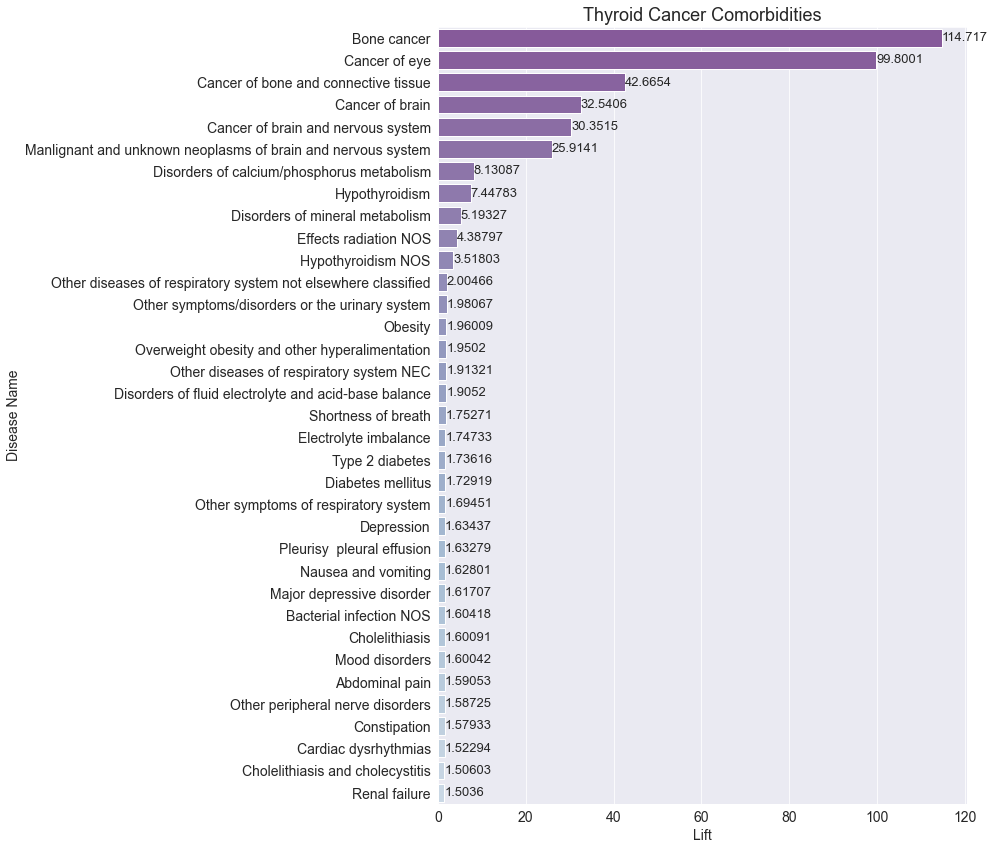

In [30]:
# Barplot - seaborn

# Set figure size
plt.figure(figsize=(14,12), tight_layout=True)

# Create colour palett
palette = sns.color_palette('BuPu_r', 70) #len(psar_ThyCa1_5['lift'])) = 35. Using 70 = larger range of colours so can choose middle shades
#palette.reverse()

# Plot graph 
ax = sns.barplot(x=psar_ThyCa1_5['lift'],
                 y=psar_ThyCa1_5['Antecedent Disease'],
                 palette=np.array(palette[20:55]), # Only selecting the middle shades - the extremes are too light or dark
                 ci=None)

# Add bar values
ax.bar_label(ax.containers[0])

# Set axis labels and title
ax.set(title='Thyroid Cancer Comorbidities', xlabel='Lift', ylabel='Disease Name')

# Save figure as png
fig = ax.get_figure()
fig.savefig("ThyCa_lift.png") 

# Show figure 
plt.show()